# Intro to Pandas
- Series object
- DataFrame object

In [1]:
import pandas as pd

data = dict(AI = 25, NET=30, APP=27, Java=23)
series = pd.Series(data=data) 
series
#In pandas and numpy we "hårdtypar" the datatype (for example int64, 64bytes). This will be faster.

AI      25
NET     30
APP     27
Java    23
dtype: int64

In [2]:
data2 = dict(AI = 25, NET=30, APP=27, Java="23")
pd.Series(data2) #datatype for strings is object, for bools it is object, for floats it is float64

AI      25
NET     30
APP     27
Java    23
dtype: object

In [3]:
#Extracting values
print(f"series[0]: {series[0]}")
print(f"series[-1]: {series[-1]}")

#Extracting keys
print(f"series.keys: {series.keys()}") #Prints the keys
print(f"series.keys[-2]: {series.keys()[-2]}") #Prints the second last key

#With the help of series object we can build dataframes (in table form, representing several dimensions)

series[0]: 25
series[-1]: 23
series.keys: Index(['AI', 'NET', 'APP', 'Java'], dtype='object')
series.keys[-2]: APP


## DataFrame

In [4]:
df = pd.DataFrame(series) #We can add dictionaries, lists, arrays
print(df)
#We also have column names, default is 0
df = pd.DataFrame(series, columns=("Number Students",)) #Should be a tuple, therefore we have to have a comma
df

       0
AI    25
NET   30
APP   27
Java  23


,Number Students
AI,25
NET,30
APP,27
Java,23


In [5]:
languages = pd.Series(dict(AI = "Python", NET = "C#", APP = "Kotlin", Java = "Java"))
#We create a dictionary with the keys that are the column names, and the values that will be the rows (they will be merged if they have the same keys in the data)
df = pd.DataFrame({"Students":series, "Language":languages}) #Creates a matrix, with the same keys (series and language has the same keys)
df

,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin
Java,23,Java


In [6]:
df.index #Reach the indexes

Index(['AI', 'NET', 'APP', 'Java'], dtype='object')

## Data Selection

In [7]:
df.Students #We will get out a Series of the data for the students (attribute approach)

#This will fail if we have an attribute that is already in Python (for example sum for column name df.sum)

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [8]:
df["Students"] #Gets a Series with dictionary-keys approach (this is more robust and better to do) __get__item(())

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [9]:
#Multiple columns
df[["Language", "Students"]] #We use a list and can reach both Language and Students

,Language,Students
AI,Python,25
NET,C#,30
APP,Kotlin,27
Java,Java,23


In [10]:
#Want to get all rows > 24 students
#You should not loop through items, because this is very slow and it is no longer any meaning with using the fast dataframe type

#This will generate True or False
print(df["Students"] > 24) #They have operated overloaded the __getitem__()


#This is called masking (pick out elements with 1 or 0 or True or False)
large_groups = df[df["Students"] > 24] #Picked out all of the rows that are True
print(large_groups)
large_groups.info()

AI       True
NET      True
APP      True
Java    False
Name: Students, dtype: bool
     Students Language
AI         25   Python
NET        30       C#
APP        27   Kotlin
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, AI to APP
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Students  3 non-null      int64 
 1   Language  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 72.0+ bytes


Text(0.5, 1.0, 'Antal studenter i olika program')

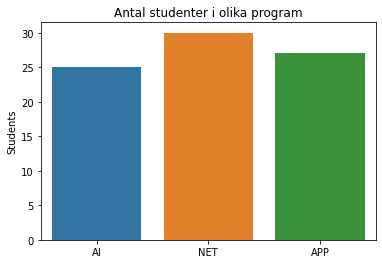

In [11]:
#The functionalities from matplotlib will also work on seaborn (seaborn is a higher abstraction of matplotlib)
#seaborn is nice to use for dataframes
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data=large_groups, x=large_groups.index, y="Students") #Here we choose the columns for x and y
plt.title("Antal studenter i olika program") #Can also use seaborns methods for this

In [12]:
# Read Excel
calories = pd.read_excel("Data/calories.xlsx") #We get a dataframe with several columns
calories #We get the whole data frame (although truncated)
calories.head(3) #The head of the dataframe, three rows

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ


In [13]:
calories.iloc[3:9] #9 is not included
calories.info() #The columns and the number of object that are non-null (i.e. have values) and the type of objects
calories.describe() #Gives statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
count,2225,2225,2225,2225,2225
unique,44,1993,2,524,524
top,BakingIngredients,Roast Beef,100g,100 cal,420 kJ
freq,95,4,1802,26,26


In [14]:
calories["FoodCategory"].unique() #Gets an array of the unique categories in our dataset

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [15]:
calories["per100grams"].unique() #We have 100g and 100ml, so two main categories

array(['100g', '100ml'], dtype=object)

## Data Cleaning

- Convert String to int
- Change column names
- Separate liquids and solids

In [16]:
#Most of the methods return a value and we therefore have to assign it to a new variable
calories = calories.rename(dict(Cals_per100grams="Calories", per100grams="per100"), axis="columns") #Rename will be applied to the rows, we therefore have to make it apply to the columns

In [17]:
calories.tail() #Tail gives us the bottom

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
2224,Spreads,Wild Honey,100g,286 cal,1201 kJ


In [18]:
# DataCleaning
# We use the string method and slice it at -3, so we remove the cal (says 62 cal)
# We chang the type to int by using astype
calories["Calories"] = calories["Calories"].str[:-3].astype(int) #DO NOT FORGET TO ASSIGN IT TO THE CORRECT COLUMN, OTHERWISE WE WILL OVERWRITE THE WHOLE DATAFRAME
calories.head()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [19]:
calories["per100"].value_counts()

100g     1802
100ml     423
Name: per100, dtype: int64

In [20]:
#Check the number of rows and we can count how many of 100g and 100ml
solids = calories[calories["per100"] == "100g"] #Now we get a list with only the calories that are counted for 100 g
liquids = calories[calories["per100"] == "100ml"] #Now we get a list with only the calories that are counted for 100 ml
liquids

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ
...,...,...,...,...,...
2173,Sauces&Dressings,Soy Sauce,100ml,67,281 kJ
2182,Sauces&Dressings,Vinaigrette,100ml,120,504 kJ
2183,Sauces&Dressings,Worcestershire Sauce,100ml,78,328 kJ
2184,Sauces&Dressings,Yogurt Dressing,100ml,45,189 kJ


## Find top 5 categories with highest calories

In [21]:
solids_top5 = solids.sort_values(by="Calories", ascending=False).head() #Sort it by the column calories, ascending=False gives high to low
solids_top5 #We have the five highest values, because head() generates the five highest

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [22]:
liquids_top5 = liquids.sort_values(by="Calories", ascending=False).head() 
liquids_top5

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


<AxesSubplot:xlabel='FoodItem', ylabel='Calories'>

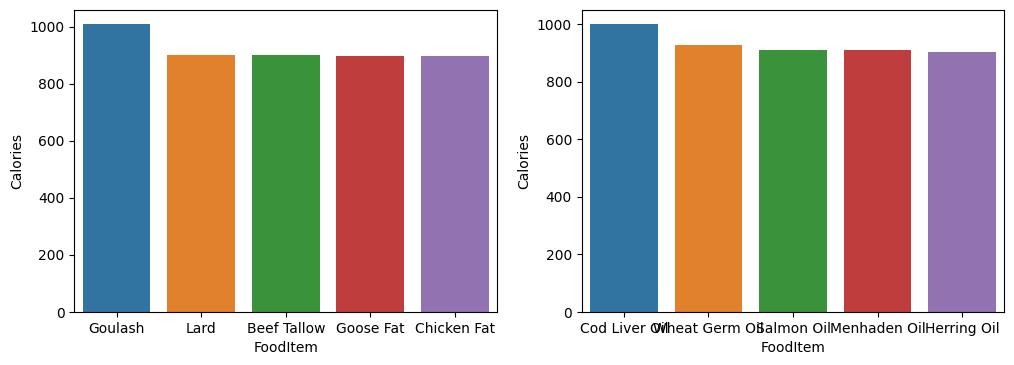

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, dpi=100, figsize=(12, 4))
sns.barplot(data=solids_top5, x="FoodItem", y="Calories", ax=ax[0])
sns.barplot(data=liquids_top5, x="FoodItem", y="Calories", ax=ax[1])